<a href="https://colab.research.google.com/github/ShabatA/AI-course/blob/master/ML/NaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package libfuse2:amd64.
(Reading database ... 26397 files and directories currently installed.)
Preparing to unpack .../libfuse2_2.9.7-1ubuntu1_amd64.deb ...
Unpacking libfuse2:amd64 (2.9.7-1ubuntu1) ...
Selecting previously unselected package fuse.
Preparing to unpack .../fuse_2.9.7-1ubuntu1_amd64.deb ...
Unpacking fuse (2.9.7-1ubuntu1) ...
Selecting previously unselected package google-drive-ocamlfuse.
Preparing to unpack .../google-drive-ocamlfuse_0.7.1-0ubuntu3~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.1-0ubuntu3~ubuntu18.04.1) ...
Setting up libfuse2:amd64 (2.9.7-1ubuntu1) ...
Processing triggers for libc-bin (2.27-3ubuntu1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Setting up fuse (2.9.7-1ubuntu1) ...
Setting up google-drive-ocamlfuse (0.7.1-0ubuntu3~ubuntu18.04.1) ...


In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

fuse: mountpoint is not empty
fuse: if you are sure this is safe, use the 'nonempty' mount option


In [0]:
import os
os.chdir("drive//ML_Notebooks")

## Import the Data set

In [0]:
from prep_terrain_data import makeTerrainData
features_train, labels_train, features_test, labels_test = makeTerrainData()

features=[grade, bumpiness]
labels is zero or one. Zero indicate fast and one indicate slow

In [0]:
features_train[0:4]

[[0.6394267984578837, 0.09935462460613032],
 [0.025010755222666936, 0.6856802654812854],
 [0.27502931836911926, 0.5444658614821449],
 [0.22321073814882275, 0.9778425294520467]]

In [0]:
labels_train[0:4]

[0.0, 0.0, 0.0, 1.0]

Train your classifier on one data set and tested on a different data set.
If you use the same data for train and test you will always get 100%.

Usually you split your data set (Ex. 80% train and 20% test)

## Draw the Terrain Data

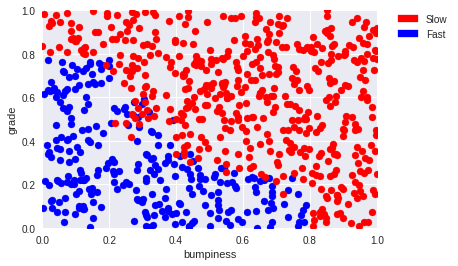

In [0]:
### the training data (features_train, labels_train) have both "fast" and "slow" points mixed
### in together--separate them so we can give them different colors in the scatterplot,
### and visually identify them
import matplotlib.patches as mpatches
from class_vis import prettyPicture, output_image
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl

grade_fast = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==0]
bumpy_fast = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==0]
grade_slow = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==1]
bumpy_slow = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==1]

%matplotlib inline
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)
plt.scatter(bumpy_fast, grade_fast, color = "b")
plt.scatter(grade_slow, bumpy_slow, color = "r")
red_patch = mpatches.Patch(color='red', label='Slow')
blue_patch = mpatches.Patch(color='blue', label='Fast')
plt.legend(handles=[red_patch, blue_patch],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("bumpiness")
plt.ylabel("grade")
plt.show()

# Naive Bayes

## GaussianNB Deployment 

In [0]:
### import the sklearn module for GaussianNB
from sklearn.naive_bayes import GaussianNB

In [0]:
### create classifier
clf = GaussianNB()

In [0]:
### fit the classifier on the training features and labels
clf.fit(features_train, labels_train)

GaussianNB(priors=None)

BEGIN_IMAGE_f9825uweof8jw9fj4r8{"bytes": "iVBORw0KGgoAAAANSUhEUgAAAbAAAAEgCAYAAADVKCZpAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz\nAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMS4yLCBo\ndHRwOi8vbWF0cGxvdGxpYi5vcmcvNQv5yAAAIABJREFUeJztvXt4VeWZ9//ZSQgEAoEo4aBBIvVQ\n4LWFopbR1hNQ7djiTGcqvmJ7qZetB6xC1bFw2dhOoXZAdKT+rO2vtb8LacXx5QeOrVbroZ06QbQj\nzBCqUpAYNBwiEAgEctrvHysr2dlZa+11Xs+z9/25Lq6ws3bWevaz1n6+z30/930/qXQ6nUYQBEEQ\nNKMo6QYIgiAIgh9EwARBEAQtEQETBEEQtEQETBAEQdASETBBEARBS0TABEEQBC0RARMEQRC0RARM\nEARB0BIRMEEQBEFLRMAEQRAELREBEwRBELREBEwQBEHQEhEwQRAEQUtEwARBEAQtEQETBEEQtEQE\nTBAEQdASETBBEARBS0TABEEQBC0RARMEQRC0RARMEARB0BIRMEEQBEFLRMAEQRAELREBEwRBELRE\nBEwQBEHQEhEwQRAEQUtEwARBEAQtEQETBEEQtEQETBAEQdASETBBEARBS0TABEEQBC0RARMEQRC0\nRARMEARB0BIRMEEQBEFLRMAEQRAELSlJugFR8b1UKukmCIKQxShgAdYz5zTwNvBcz/9zMQeYafH7\nOuBFvw2M4JpJtNOkBLgVo9+dOAj8P0AnUJt20/tqIBaY0I8SjIc9b2c2QqIcAVpsjqWA6cBsF+cp\nAc62OXYW0Ty/fq/5EoZYHQC6en7W9fw+ajqBd1y8b1fPe3VDxikBMAaP2Rhf0AqMQeYdjC+ZPvOx\n+CkBhmMMzDoOAHFjDqhWFo

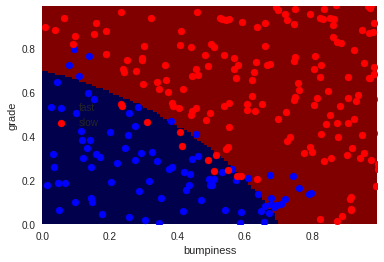

In [0]:
### draw the decision boundary with the text points overlaid
prettyPicture(clf, features_test, labels_test)
output_image("test.png", "png", open("test.png", "rb").read())


## Accuracy

Accuracy: is the number of points that are classified correctly divided by the total number of points in the test set.

$$Accuracy = \frac{\text{points correctly classified}}{\text{All points}}$$

In [0]:
### import the sklearn module for GaussianNB
from sklearn.naive_bayes import GaussianNB

### create classifier
clf = GaussianNB()

### fit the classifier on the training features and labels
clf.fit(features_train, labels_train)

### use the trained classifier to predict labels for the test features
pred = clf.predict(features_test)

### calculate and return the accuracy on the test data
### this is slightly different than the example, 
### where we just print the accuracy
### you might need to import an sklearn module
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(labels_test, pred)
print (accuracy)

0.884


So 88.4% as correctly classified ![alt text](https://media.giphy.com/media/xT4uQDry4VN7j98pig/giphy.gif)

Not so far!!!! This mean that our car will crash 11.6% at the time

## Advantage of Naive Bayes:


*   Super simple
*   Easy to implement
*   Does a great job in practice

## Disadvantage:


*   Can’t learn interactions between features (e.g., order of words, it can’t learn that although you love movies with Brad Pitt and Tom Cruise, you hate movies where they’re together)


